# Exercise 6 

## Index No: 190162F

## Name : Ekanayaka S.D.

### Question 1

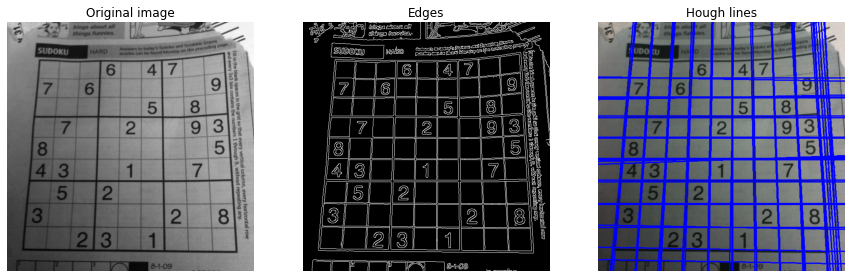

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im = cv.imread(r'./sudoku.png' , cv.IMREAD_COLOR)

assert im is not None

gray = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
edged = cv.Canny(gray,20,120,apertureSize = 3)
lines = cv.HoughLines(edged,1,np.pi/180,175)

for line in lines:
    Rho,Theta = line[0]
    a = np.cos(Theta)
    b = np.sin(Theta)
    x_0,y_0 = a*Rho, b*Rho
    x_1,y_1 = int(x_0 + 1000*(-b)),int(y_0+1000*(a))
    x_2,y_2 = int(x_0 - 1000*(-b)),int(y_0-1000*(a))
    cv.line(im,(x_1,y_1),(x_2,y_2),(0,0,255),2)
cv.namedWindow("Image",cv.WINDOW_NORMAL)
fig, ax = plt.subplots(1, 3, figsize=(15, 10)) 
ax[0].imshow(gray, cmap='gray') 
ax[0].axis('off') 
ax[0].set_title("Original image") 
ax[1].imshow(edged, cmap='gray') 
ax[1].axis('off') 
ax[1].set_title("Edges") 
ax[2].imshow(im) 
ax[2].axis('off') 
ax[2].set_title("Hough lines") 
plt.show() 


### Question 2

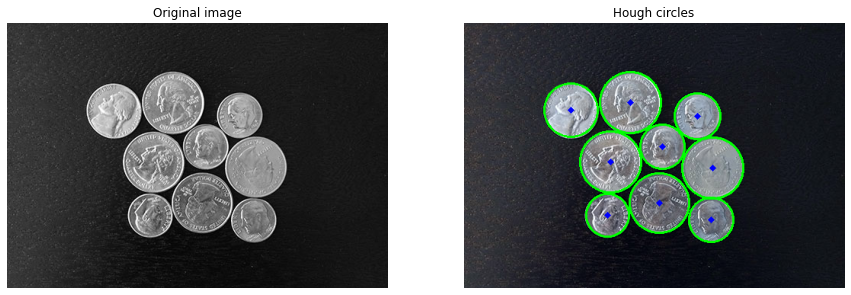

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im = cv.imread(r'./coins.jpg' , cv.IMREAD_COLOR)

assert im is not None

gray = cv.cvtColor(im,cv.COLOR_BGR2GRAY)

circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,50,param1=150,param2=20,minRadius=18,maxRadius=41)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv.circle(im,(i[0],i[1]),i[2],(0,255,0),2)
    cv.circle(im,(i[0],i[1]),2,(0,0,255),3)
fig, ax = plt.subplots(1, 2, figsize=(15, 10)) 
ax[0].imshow(gray, cmap='gray') 
ax[0].axis('off') 
ax[0].set_title("Original image") 
ax[1].imshow(im) 
ax[1].axis('off') 
ax[1].set_title("Hough circles") 
plt.show() 

### Question 3

x = 29.0,y = 109.0, scale = 1.0 , orientation = 0.0 , p1 = (4, 76), p2 = (54, 141)


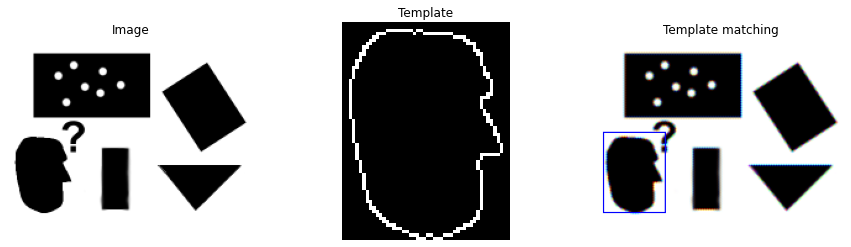

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img=cv.imread(r'pic1.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None
temp=cv.imread(r'templ.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert temp is not None


im_edges = cv.Canny(img,50,250)
temp1 = cv.Canny(temp,50,250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(temp1)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions,votes = alg.detect(im_edges)

out = cv.cvtColor(img,cv.COLOR_BAYER_BG2BGR)
for x,y, scale, orientation in positions[0]:
    halfHeight = temp1.shape[0]/2. * scale
    halfWidth = temp1.shape[1]/2. * scale
    p1 = (int(x-halfWidth),int(y-halfHeight))
    p2 = (int(x+halfWidth),int(y+halfHeight))
    
    print("x = {},y = {}, scale = {} , orientation = {} , p1 = {}, p2 = {}".format(x,y,scale,orientation,p1,p2))
    cv.rectangle(out,p1,p2,(0,0,255))
fig, ax = plt.subplots(1, 3, figsize=(15, 4)) 
ax[0].imshow(img, cmap='gray') 
ax[0].axis('off') 
ax[0].set_title("Image") 
ax[1].imshow(temp1, cmap='gray') 
ax[1].axis('off') 
ax[1].set_title("Template") 
ax[2].imshow(out) 
ax[2].axis('off') 
ax[2].set_title("Template matching") 
plt.show() 

### Question 4

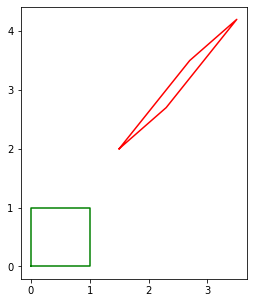

In [8]:


import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

a,b,c,d=[0,0,1],[0,1,1],[1,1,1],[1,0,1]
X=np.array([a,b,c,d]).T

theta=np.pi*30/180
s=2
tx,ty=1.5,2
#H=np.array([[s*np.cos(theta),-s*np.sin(theta),tx],[s*np.sin(theta),s*np.cos(theta),ty],[0,0,1]])
#Y=H@X

a11,a12,a21,a22=0.8,1.2,0.7,1.5
A=np.array([[a11,a12,tx],[a21,a22,ty],[0,0,1]])
Y=A@X

x=np.append(X[0,:],X[0,0])
y=np.append(X[1,:],X[1,0])

fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.plot(x,y,color='g')
ax.set_aspect('equal')


x=np.append(Y[0,:],Y[0,0])
y=np.append(Y[1,:],Y[1,0])

ax.plot(x,y,color='r')
ax.set_aspect('equal')
plt.show()

### Question 5

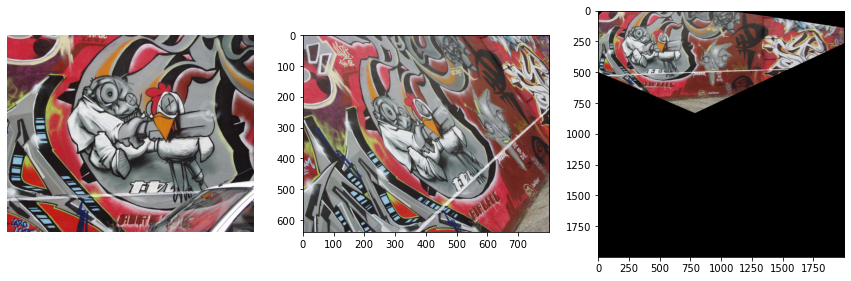

In [13]:
im1 = cv.imread(r'img1.ppm', cv.IMREAD_ANYCOLOR) 
im4 = cv.imread(r'img4.ppm', cv.IMREAD_ANYCOLOR) 
 
H = [] 
 
with open(r'H1to4p') as f:     
    H = np.array([[float(h) for h in line.split()] for line in f]) 
 
im1to4 = cv.warpPerspective(im4,np.linalg.inv(H),(2000,2000))
 
fig, ax = plt.subplots(1,3, figsize = (15,5)) 
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB)) 
ax[1].imshow(cv.cvtColor(im4, cv.COLOR_BGR2RGB)) 
ax[2].imshow(cv.cvtColor(im1to4, cv.COLOR_BGR2RGB))
for i in range(3):     
    ax[i].axis("off") 
    plt.show() 